In [46]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sp

In [70]:
file_path= r"C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\BCT\macaque47.mat"

In [71]:
from scipy.io import loadmat

file_dict = loadmat(file_path)

In [78]:
matriz= file_dict["CIJ"]
columnas= file_dict["Names"]

In [79]:
file_dict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'CIJ', 'Names'])

In [118]:
matriz.shape, len(columnas)

((47, 47), 47)

In [119]:
macaco_df= pd.DataFrame(data= matriz, columns= columnas, index= columnas)

In [120]:
macaco_df.columns = [columna.split(sep = ' ')[0] for columna in macaco_df.columns]
macaco_df.index = macaco_df.columns
#3️⃣ columna.split(sep=' ')
#Divide el nombre de la columna por los espacios.
#Por ejemplo:

#'Nombre completo' → ['Nombre', 'completo']

#'Edad años' → ['Edad', 'años']

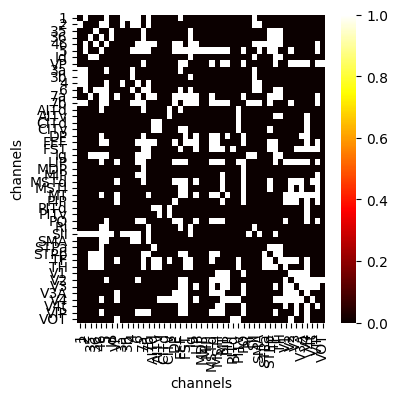

In [121]:
plt.figure(figsize=(4,4))
ax= sns.heatmap(macaco_df.values,
                annot= False, cmap ="hot", fmt=".2f",
                xticklabels=macaco_df.columns, yticklabels= macaco_df.index)
ax.set(xlabel="channels", ylabel="channels")
plt.show()

In [ ]:
##Actividad
# Filtrar el datafrane para quedarse las columnas 15 a 35
# Mostrar el mapa de  calor
# Crear el grado dirigido
#Calcular el grafo del grafo

In [122]:
macaco_filtrado = macaco_df.iloc[:, 15:36]


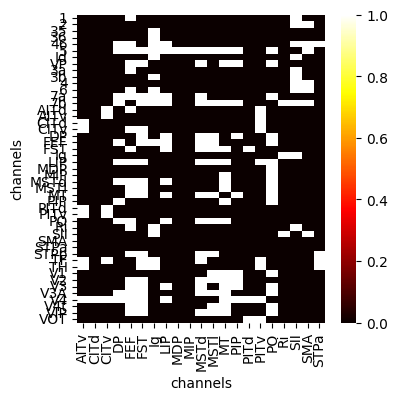

In [123]:
plt.figure(figsize=(4,4))
ax= sns.heatmap(macaco_filtrado.values,
                annot= False, cmap ="hot", fmt=".2f",
                xticklabels=macaco_filtrado.columns, yticklabels= macaco_filtrado.index)
ax.set(xlabel="channels", ylabel="channels")
plt.show()

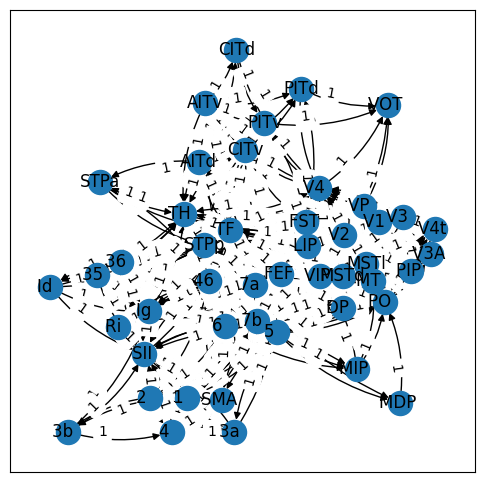

In [124]:

plt.figure(figsize=(6,6))
pos= nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, arrows=True, arrowstyle= "-|>", connectionstyle="arc3,rad=0.15")
pesos= nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, pesos,label_pos= 0.3);

In [ ]:
#Actividad
#Plotear en 3d el grafo completo utilizando las coordenadas del archivo ccv
#pd.read_csv

In [128]:
coord_df=pd.read_csv(r"C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\BCT\macaco_M132_F99_LH.csv")

In [130]:
coord_df.set_index('region', inplace =True, drop = True)
coord_df.index

Index(['V1', 'V2', 'V3', 'V3A', 'V4', 'V4t', 'MT', 'MSTd', 'MSTl', 'LIP',
       'VIP', 'PIP', 'PO', 'FEF', '46', '7a', '7b', 'SMA', '6', '4', '3a',
       '3b', '1', '2', '5', 'DP', 'MDP', 'MIP', 'FST', 'AITd', 'AITv', 'PITd',
       'PITv', 'CITd', 'CITv', 'VOT', 'TF', 'TH', '35', '36', 'Id', 'VP', 'Ig',
       'STPa', 'STPp', 'Ri', 'SII'],
      dtype='object', name='region')

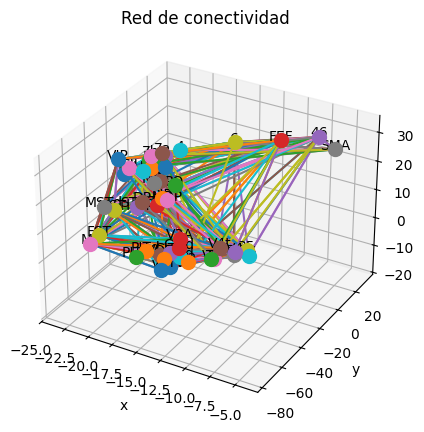

In [131]:
#Grafo 3D
GG = nx.from_pandas_adjacency(macaco_df, create_using=nx.DiGraph());


pos3D = {region: (coord_df.loc[region, 'x'],
                coord_df.loc[region, 'y'],
                 coord_df.loc[region, 'z']) for region in coord_df.index}
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection = '3d') #el 111 indica la malla de subplots que va a crear, una de 111 solo será un subplot
for region,(x,y,z) in pos3D.items():
    ax.scatter(x,y,z, s=100)
    ax.text(x,y,z+0.03, region, fontsize = 10, ha='center')

for i,j, data in GG.edges(data=True):
    x = [pos3D[i][0], pos3D[j][0]]
    y = [pos3D[i][1], pos3D[j][1]]
    z = [pos3D[i][2], pos3D[j][2]]
    ax.plot(x,y,z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Red de conectividad')
plt.show()